In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.special import softmax
from modules import FaceDetector
from modules.utils import CropImage

In [3]:
face_detector = FaceDetector()
crop_image = CropImage()

I0000 00:00:1709102313.372265  706743 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1709102313.383889  706743 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
model = tf.keras.models.load_model('models/untispoofing')

In [19]:
image = cv2.imread('images/image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
data = face_detector.detecFace(image)

/Users/javohirjalilov/github/cvProject/ProjectsPR/Face/face-untispoofing-detection/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [7]:
x1, y1, x2, y2 = data

In [8]:
im1 = cv2.rectangle(image.copy(), (x1, y1), (x2, y2), (255, 0, 0), 2)

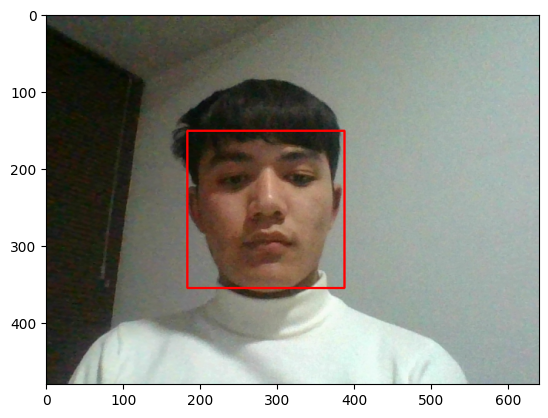

In [9]:
plt.imshow(im1)
plt.show()

In [10]:
crop = crop_image.crop(image, (x1, y1, x2 - x1, y2 - y1))

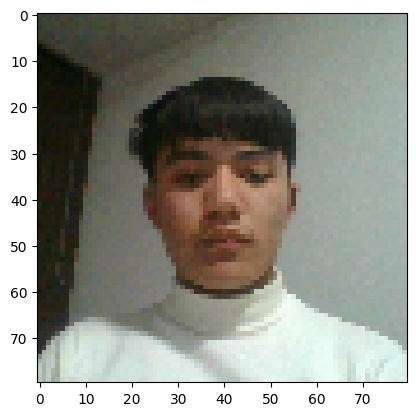

In [11]:
plt.imshow(crop)
plt.show()

In [12]:
model = tf.keras.models.load_model("models/untispoofing")

In [20]:
img2 = cv2.resize(image, (80,80))

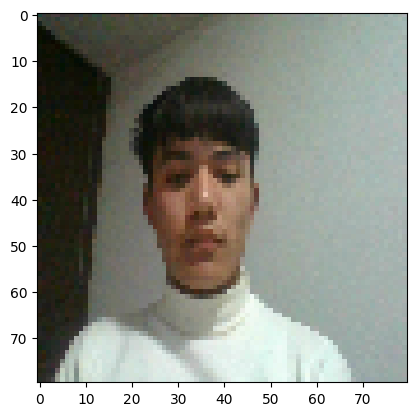

In [21]:
plt.imshow(img2)
plt.show()

In [22]:
dim_img = np.expand_dims(crop, axis=0)

In [23]:
pred = model(dim_img)

In [24]:
softmax_data = softmax(pred.numpy())

In [32]:
for i in softmax_data[0]:
    print(f"{i:.5f}")

0.00004
0.99982
0.00014


In [25]:
label = softmax_data.argmax()

In [26]:
label

1

In [33]:
converter = tf.lite.TFLiteConverter.from_saved_model('models/untispoofing') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

2024-02-28 11:46:19.358865: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-28 11:46:19.358902: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 135, Total Ops 252, % non-converted = 53.57 %
 * 135 ARITH ops

- arith.constant:  135 occurrences  (f32: 134, i32: 1)



  (f32: 12)
  (f32: 49)
  (f32: 2)

  (f32: 17)
  (f32: 33)
